In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv('train.csv')

In [47]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
df.shape

(1460, 81)

In [49]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [50]:
df1 = df[['GarageQual', 'FireplaceQu', 'SalePrice']]

In [51]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
df1.isnull().sum()

,0
GarageQual,81
FireplaceQu,690
SalePrice,0


In [53]:
df1.isnull().mean()*100

,0
GarageQual,5.547945
FireplaceQu,47.260274
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

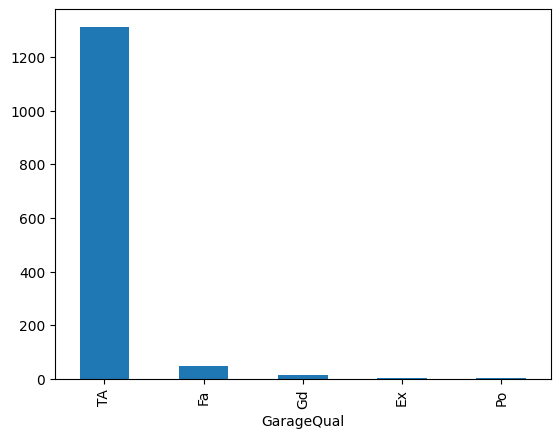

In [54]:
df1['GarageQual'].value_counts().plot(kind='bar')

In [55]:
df1['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQusl')

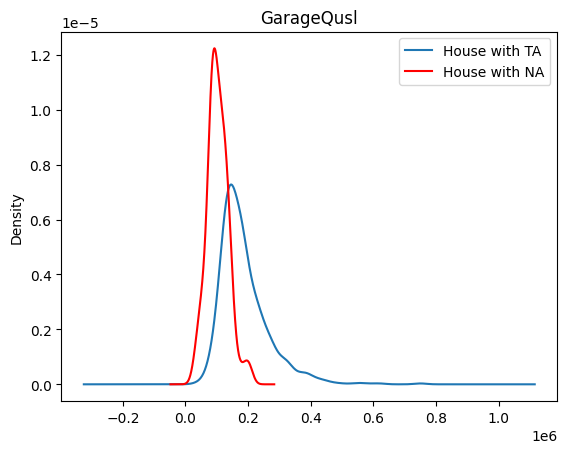

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

df1[df1['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df1[df1['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, lables = ax.get_legend_handles_labels()
labels = ['House with TA', 'House with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQusl')

In [57]:
temp = df1[df1['GarageQual']=='TA']['SalePrice']

In [58]:
df1['GarageQual'].fillna('TA', inplace=True)

/tmp/ipython-input-2542236190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['GarageQual'].fillna('TA', inplace=True)
/tmp/ipython-input-2542236190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

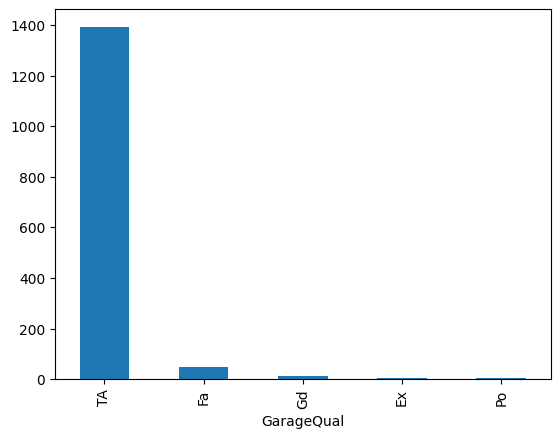

In [59]:
df1['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

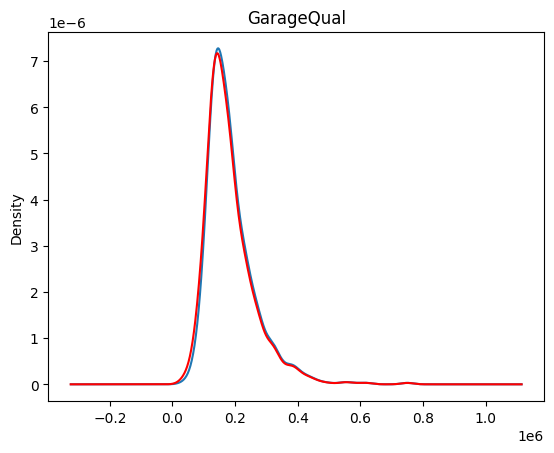

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

#distribution of the variable after imputation
df1[df1['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variables', 'Imputed variables']

#add titles
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

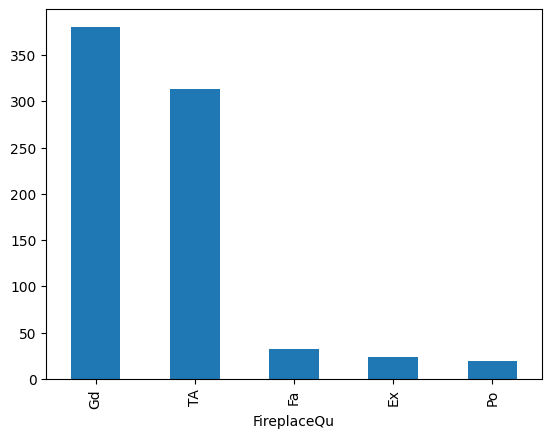

In [61]:
df1['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

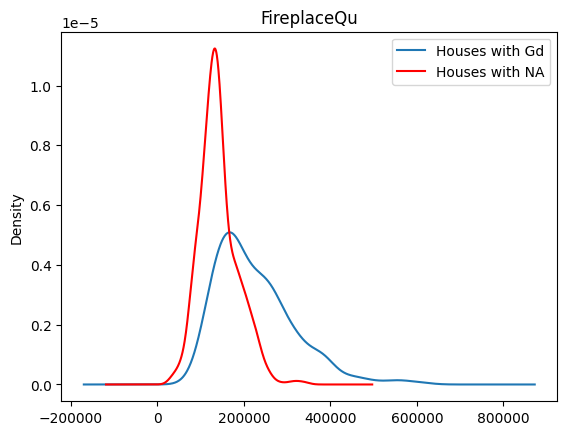

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [84]:
temp1 = df1[df1['FireplaceQu']=='Gd']['SalePrice']

In [85]:
df1['FireplaceQu'].fillna('Gd', inplace=True)

/tmp/ipython-input-1811466042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

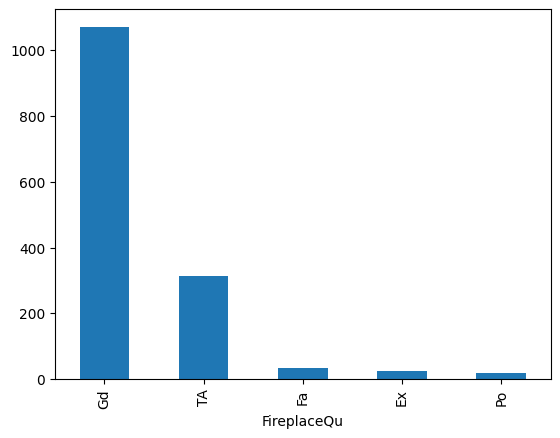

In [86]:
df1['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

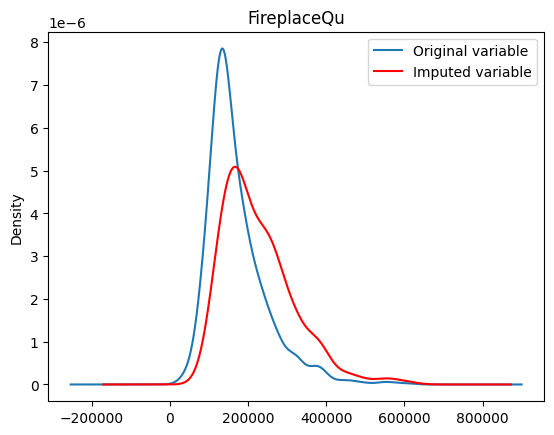

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [88]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('SalePrice', axis=1), df1['SalePrice'], test_size=0.2, random_state=42)

In [93]:
X_train.sample(5)

,GarageQual,FireplaceQu
440,TA,Gd
1139,TA,Gd
1298,TA,Gd
234,TA,TA
474,TA,Gd


In [94]:
y_train.sample(5)

,SalePrice
813,157900
406,115000
775,162000
903,240000
392,106500


In [96]:
from sklearn.impute import SimpleImputer

In [97]:
SI = SimpleImputer(strategy='most_frequent')

In [99]:
X_train_impute = SI.fit_transform(X_train)
X_test_impute = SI.transform(X_test)

In [103]:
SI.statistics_

array(['TA', 'Gd'], dtype=object)